In [468]:
import pandas as pd
#Because dataset is big (29 columns) we need to show every columns using pd
pd.set_option('max_columns', None)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
file_url = r'C:\Users\Michel\git2\Ironhack-DAFT-Project7-ML-Netflix\imdb_processed.csv'
file_ori = pd.read_csv(file_url)
#We make a copy of the file and work on it
file = file_ori.copy()
file.head()


,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
0,0,Dinosaur Planet,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",7.7,474.0,['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0
1,1,Get Up and Dance!,1994.0,video movie,['Family'],8.1,18.0,['United States'],['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,83.0
2,2,8 Man,1992.0,movie,"['Action', 'Sci-Fi']",5.5,93.0,['Japan'],['Japanese'],"['Kai Shishido', 'Etsushi Takahashi', 'Sachiko...",['Yasuhiro Horiuchi'],['Carole King'],"['Kazumasa Hirai', 'Jirô Kuwata', 'Junko Suzuki']",NaN
3,3,What the #$*! Do We (K)now!?,2004.0,movie,"['Documentary', 'Comedy', 'Drama', 'Fantasy', ...",5.3,13432.0,['United States'],"['English', 'German', 'Spanish']","['Marlee Matlin', 'Elaine Hendrix', 'John Ross...","['William Arntz', 'Betsy Chasse', 'Mark Vicente']",['Christopher Franke'],"['William Arntz', 'Betsy Chasse', 'Matthew Hof...",60.0
4,4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991.0,movie,"['Comedy', 'Horror', 'Sci-Fi']",4.5,2177.0,['United States'],['English'],"['Brick Bronsky', 'Lisa Gaye', 'Leesa Rowland'...",['Eric Louzil'],['Bob Mithoff'],"['Lloyd Kaufman', 'Carl Morano', 'Matt Unger']",96.0


First we have a quick preview at the data set with head() function.
Now let's look at the info of the file.

In [469]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451 entries, 0 to 8450
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8451 non-null   int64  
 1   title       8451 non-null   object 
 2   year        8451 non-null   float64
 3   kind        8451 non-null   object 
 4   genre       8384 non-null   object 
 5   rating      8135 non-null   float64
 6   vote        8135 non-null   float64
 7   country     8152 non-null   object 
 8   language    8052 non-null   object 
 9   cast        8280 non-null   object 
 10  director    7140 non-null   object 
 11  composer    5722 non-null   object 
 12  writer      7204 non-null   object 
 13  runtime     6798 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 924.5+ KB


In [470]:
## We look for non-numeric data
cat_df = file.select_dtypes(include=['object'])
cat_df.head()

,title,kind,genre,country,language,cast,director,composer,writer
0,Dinosaur Planet,tv mini series,"['Documentary', 'Animation', 'Family']",['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']"
1,Get Up and Dance!,video movie,['Family'],['United States'],['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN
2,8 Man,movie,"['Action', 'Sci-Fi']",['Japan'],['Japanese'],"['Kai Shishido', 'Etsushi Takahashi', 'Sachiko...",['Yasuhiro Horiuchi'],['Carole King'],"['Kazumasa Hirai', 'Jirô Kuwata', 'Junko Suzuki']"
3,What the #$*! Do We (K)now!?,movie,"['Documentary', 'Comedy', 'Drama', 'Fantasy', ...",['United States'],"['English', 'German', 'Spanish']","['Marlee Matlin', 'Elaine Hendrix', 'John Ross...","['William Arntz', 'Betsy Chasse', 'Mark Vicente']",['Christopher Franke'],"['William Arntz', 'Betsy Chasse', 'Matthew Hof..."
4,Class of Nuke 'Em High Part II: Subhumanoid Me...,movie,"['Comedy', 'Horror', 'Sci-Fi']",['United States'],['English'],"['Brick Bronsky', 'Lisa Gaye', 'Leesa Rowland'...",['Eric Louzil'],['Bob Mithoff'],"['Lloyd Kaufman', 'Carl Morano', 'Matt Unger']"


In [471]:
# We look for numeric data
num_df = file.select_dtypes(exclude=['object'])
num_df.head()

,Unnamed: 0,year,rating,vote,runtime
0,0,2003.0,7.7,474.0,50.0
1,1,1994.0,8.1,18.0,83.0
2,2,1992.0,5.5,93.0,NaN
3,3,2004.0,5.3,13432.0,60.0
4,4,1991.0,4.5,2177.0,96.0


In [472]:
def printColumnTypes(non_numeric_df, numeric_df):
    '''separates non-numeric and numeric columns'''
    print("Non-Numeric columns:")
    for col in non_numeric_df:
        print(f"{col}")
    print("")
    print("Numeric columns:")
    for col in numeric_df:
        print(f"{col}")

In [473]:
printColumnTypes(cat_df, num_df)

Non-Numeric columns:
title
kind
genre
country
language
cast
director
composer
writer

Numeric columns:
Unnamed: 0
year
rating
vote
runtime


In [474]:
## Check for duplicates
file.duplicated().any()

False

In [475]:
## Missing data check
file.isna().sum()

Unnamed: 0       0
title            0
year             0
kind             0
genre           67
rating         316
vote           316
country        299
language       399
cast           171
director      1311
composer      2729
writer        1247
runtime       1653
dtype: int64

In [476]:
#Check all the lines with missing data
file[file.isna().any(axis=1)]

,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
0,0,Dinosaur Planet,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",7.7,474.0,['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0
1,1,Get Up and Dance!,1994.0,video movie,['Family'],8.1,18.0,['United States'],['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,83.0
2,2,8 Man,1992.0,movie,"['Action', 'Sci-Fi']",5.5,93.0,['Japan'],['Japanese'],"['Kai Shishido', 'Etsushi Takahashi', 'Sachiko...",['Yasuhiro Horiuchi'],['Carole King'],"['Kazumasa Hirai', 'Jirô Kuwata', 'Junko Suzuki']",NaN
5,5,Antarctica: The End of Earth - Iceberg,1999.0,episode,"['Documentary', 'Family']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,['George Page'],120.0
6,6,Neil Diamond: Greatest Hits Live,1988.0,video movie,"['Documentary', 'Music']",8.0,81.0,['United States'],['English'],"['Neil Diamond', 'Richard Bennett', 'Vince Cha...","['Dwight Hemion', 'Peter Israelson']",NaN,"['Kenny Solms', 'Ann Elder', 'Toem Perew']",55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8446,8446,All Monsters Attack,1969.0,movie,"['Adventure', 'Family', 'Fantasy']",3.9,4384.0,['Japan'],['Japanese'],"['Tomonori Yazaki', 'Hideyo Amamoto', 'Sachio ...","['Ishirô Honda', 'Jun Fukuda', 'Kengo Furusawa']",['Kunio Miyauchi'],"[""Shin'ichi Sekizawa""]",NaN
8447,8447,Fidel Castro,2005.0,episode,"['Documentary', 'Biography', 'History']",6.4,44.0,NaN,"['English', 'Spanish']","['Rena Baskin', 'Fulgencio Batista', 'James Bl...","['Adriana Bosch', 'M Pink Christofalo']",['Mason Daring'],['Adriana Bosch'],NaN
8448,8448,Epoch,2001.0,tv movie,"['Sci-Fi', 'Thriller']",4.9,2376.0,['United States'],['English'],"['David Keith', 'Stephanie Niznik', ""Ryan O'Ne...",['Matt Codd'],['Richard McHugh'],"['Jonathan Raymond', 'Jonathan Raymond', 'Phil...",NaN
8449,8449,The Company,2003.0,movie,"['Drama', 'Music', 'Romance']",6.3,6501.0,"['United States', 'Germany', 'United Kingdom']",['English'],"['Neve Campbell', 'Malcolm McDowell', 'James F...",['Robert Altman'],['Van Dyke Parks'],"['Neve Campbell', 'Barbara Turner', 'Barbara T...",NaN


In [477]:
#Since rating is the goal of this project we drop all the columns with NA values

In [478]:
file.dropna(subset=['rating'],axis=0,inplace=True)

In [479]:
file.isna().sum()

Unnamed: 0       0
title            0
year             0
kind             0
genre           46
rating           0
vote             0
country        177
language       283
cast            89
director      1135
composer      2456
writer        1034
runtime       1605
dtype: int64

In [480]:
#We delete Title

In [481]:
#We delete Unnamed column
del file['Unnamed: 0']

In [482]:
file.isna().sum()

title          0
year           0
kind           0
genre         46
rating         0
vote           0
country      177
language     283
cast          89
director    1135
composer    2456
writer      1034
runtime     1605
dtype: int64

In [483]:
cat_df.head()

,title,kind,genre,country,language,cast,director,composer,writer
0,Dinosaur Planet,tv mini series,"['Documentary', 'Animation', 'Family']",['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']"
1,Get Up and Dance!,video movie,['Family'],['United States'],['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN
2,8 Man,movie,"['Action', 'Sci-Fi']",['Japan'],['Japanese'],"['Kai Shishido', 'Etsushi Takahashi', 'Sachiko...",['Yasuhiro Horiuchi'],['Carole King'],"['Kazumasa Hirai', 'Jirô Kuwata', 'Junko Suzuki']"
3,What the #$*! Do We (K)now!?,movie,"['Documentary', 'Comedy', 'Drama', 'Fantasy', ...",['United States'],"['English', 'German', 'Spanish']","['Marlee Matlin', 'Elaine Hendrix', 'John Ross...","['William Arntz', 'Betsy Chasse', 'Mark Vicente']",['Christopher Franke'],"['William Arntz', 'Betsy Chasse', 'Matthew Hof..."
4,Class of Nuke 'Em High Part II: Subhumanoid Me...,movie,"['Comedy', 'Horror', 'Sci-Fi']",['United States'],['English'],"['Brick Bronsky', 'Lisa Gaye', 'Leesa Rowland'...",['Eric Louzil'],['Bob Mithoff'],"['Lloyd Kaufman', 'Carl Morano', 'Matt Unger']"


In [484]:
cat_df.columns

Index(['title', 'kind', 'genre', 'country', 'language', 'cast', 'director',
       'composer', 'writer'],
      dtype='object')

In [485]:
#Replace 
for col in cat_df.columns:
    file[col].fillna("Unknown", inplace=True)

In [486]:
file.isna().sum()

title          0
year           0
kind           0
genre          0
rating         0
vote           0
country        0
language       0
cast           0
director       0
composer       0
writer         0
runtime     1605
dtype: int64

In [487]:
file.shape

(8135, 13)

In [488]:
## Data inconsistency check
file.describe()

,year,rating,vote,runtime
count,8135.000000,8135.000000,8.135000e+03,6530.000000
mean,1991.630731,6.680000,1.873295e+04,100.169525
std,14.888466,1.281778,8.957999e+04,65.972178
min,1914.000000,1.500000,5.000000e+00,2.000000
25%,1987.000000,6.000000,3.075000e+02,82.000000
50%,1998.000000,6.900000,1.531000e+03,95.000000
75%,2002.000000,7.600000,6.897500e+03,110.000000
max,2005.000000,9.600000,2.462087e+06,1620.000000


<Figure size 720x432 with 0 Axes>

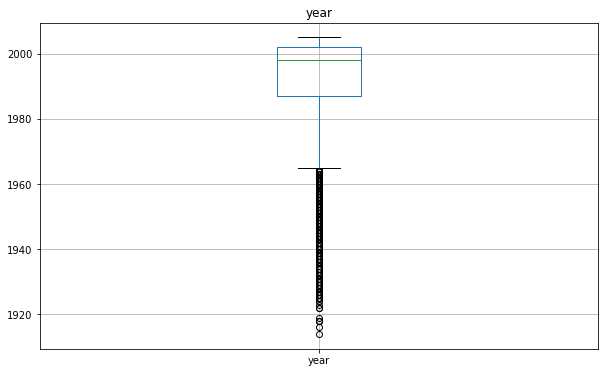

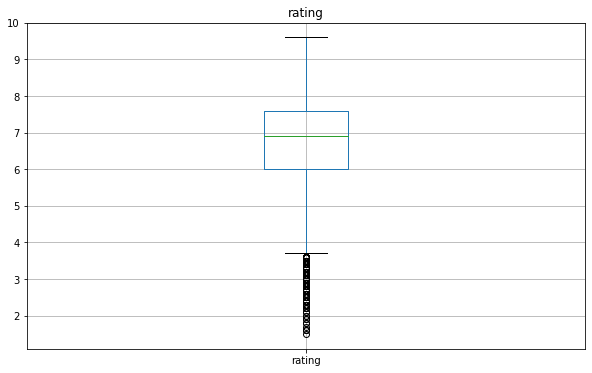

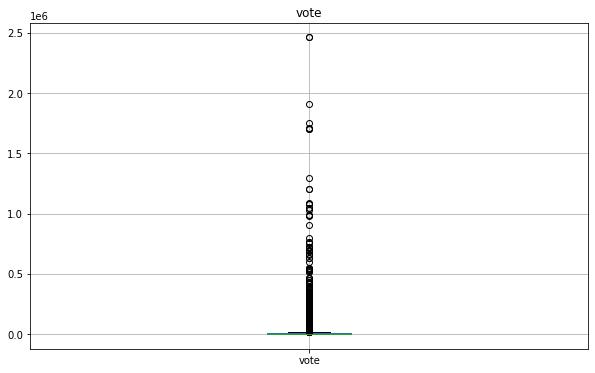

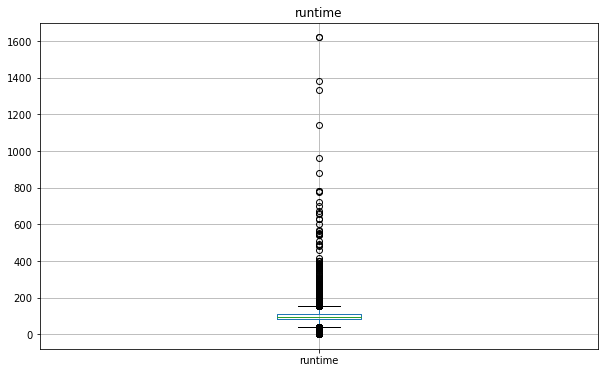

In [489]:
#Check Outliers
num_df = file.select_dtypes(exclude=['object'])
# Plot the variables (loop for plot variables) for num values
plt.figure(figsize=(10, 6))
for col in num_df:
    plt.figure(figsize=(10, 6))
    file.boxplot(column=[col])
    plt.title(col)
    plt.savefig(col+r'.png',bbox_inches='tight')

In [490]:
#We can see there are some outliers in Runtime. It seems that for TV Series, the runtime is the value of the sum of each episode.
#It then makes sense to have very long runtime. But there is no sense for Movies.
#We decide to drop Runtime > 400min for non TV series

In [491]:
file[(file['runtime'] >400) & (file['kind'] != "tv series")].shape

(29, 13)

In [492]:
file_toremove = file[(file['runtime'] >400) & (file['kind'] != "tv series")]

In [493]:
file = pd.concat([file,file_toremove]).drop_duplicates(keep=False)

In [494]:
file[file['runtime'] >400]

,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
143,French and Saunders,1987.0,tv series,['Comedy'],7.6,3221.0,['United Kingdom'],['English'],"['Dawn French', 'Jennifer Saunders', 'Simon Br...",Unknown,Unknown,"['Richard Curtis', 'Dawn French', 'Dawn French']",417.0
2858,Gargoyles,1994.0,tv series,"['Animation', 'Action', 'Adventure', 'Crime', ...",8.1,15366.0,['United States'],['English'],"['Keith David', 'Salli Richardson-Whitfield', ...",Unknown,Unknown,"['Michael Reaves', 'Michael Reaves', 'Michael ...",510.0
3349,Cracker,1993.0,tv series,"['Crime', 'Drama', 'Mystery']",8.4,6039.0,['United Kingdom'],['English'],"['Robbie Coltrane', 'Geraldine Somerville', ""K...",Unknown,Unknown,"['Jimmy McGovern', 'Jimmy McGovern', 'Jimmy Mc...",402.0
3456,CardCaptors,2000.0,tv series,"['Animation', 'Action', 'Drama', 'Family', 'Fa...",8.2,1137.0,"['United States', 'Japan', 'Canada']",['English'],"['Carly McKillip', 'Kelly Sheridan', 'Matt Hil...",Unknown,Unknown,['Clamp'],480.0
4839,Hercules: The Legendary Journeys,1995.0,tv series,"['Action', 'Adventure', 'Drama', 'Fantasy', 'R...",6.5,28719.0,"['United States', 'New Zealand']",['English'],"['Kevin Sorbo', 'Michael Hurst', 'Kevin Smith'...",Unknown,Unknown,"['Christian Williams', 'Robert Bielak', 'Rober...",402.0


In [495]:
#Now we cleaned the outliers of runtime, we decide to replace by mean by kind for missing values in runtime

In [496]:
mean_run=file[['runtime','kind']].groupby('kind',as_index=False).mean()
mean_run

,kind,runtime
0,episode,96.083333
1,movie,96.828211
2,tv mini series,94.573529
3,tv movie,96.359350
4,tv series,103.016064
5,tv short,70.875000
6,video game,120.000000
7,video movie,97.126368


In [497]:
kind=file['kind'].unique()
kind

array(['tv mini series', 'video movie', 'movie', 'tv movie', 'episode',
       'tv series', 'tv short', 'video game'], dtype=object)

In [498]:
for k in kind:
    file['runtime']=np.where((file['runtime'].isna()==True) & (file['kind']== k),mean_run[mean_run['kind'] == k]['runtime'],file['runtime'])

In [499]:
file.describe()

,year,rating,vote,runtime
count,8069.000000,8069.000000,8.069000e+03,8069.000000
mean,1991.726856,6.673491,1.863283e+04,97.157532
std,14.806143,1.278725,8.988734e+04,39.027641
min,1914.000000,1.500000,5.000000e+00,2.000000
25%,1987.000000,6.000000,3.050000e+02,87.000000
50%,1998.000000,6.900000,1.519000e+03,96.828211
75%,2002.000000,7.600000,6.801000e+03,105.000000
max,2005.000000,9.600000,2.462087e+06,510.000000


In [500]:
file.isna().sum()

title       0
year        0
kind        0
genre       0
rating      0
vote        0
country     0
language    0
cast        0
director    0
composer    0
writer      0
runtime     0
dtype: int64

In [501]:
#Let's delete all the special caracters

In [502]:
file=file.replace(to_replace=r'\[\'', value='', regex=True)

In [503]:
file=file.replace(to_replace=r'\[\"', value='', regex=True)

In [504]:
file=file.replace(to_replace=r'\'\]', value='', regex=True)

In [505]:
file=file.replace(to_replace=r'\"\]', value='', regex=True)

In [506]:
file=file.replace(to_replace=r'\'', value='', regex=True)

In [507]:
file=file.replace(to_replace=r'\"', value='', regex=True)

In [508]:
file.head()

,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
0,Dinosaur Planet,2003.0,tv mini series,"Documentary, Animation, Family",7.7,474.0,United States,English,"Christian Slater, Scott Sampson",Unknown,Unknown,"Mike Carrol, Mike Carroll, Georgann Kane",50.000000
1,Get Up and Dance!,1994.0,video movie,Family,8.1,18.0,United States,English,"Paula Abdul, Aurorah Allain, Bill Bohl, Bob Ga...",Steve Purcell,Unknown,Unknown,83.000000
2,8 Man,1992.0,movie,"Action, Sci-Fi",5.5,93.0,Japan,Japanese,"Kai Shishido, Etsushi Takahashi, Sachiko Ayase...",Yasuhiro Horiuchi,Carole King,"Kazumasa Hirai, Jirô Kuwata, Junko Suzuki",96.828211
3,What the #$*! Do We (K)now!?,2004.0,movie,"Documentary, Comedy, Drama, Fantasy, Mystery, ...",5.3,13432.0,United States,"English, German, Spanish","Marlee Matlin, Elaine Hendrix, John Ross Bowie...","William Arntz, Betsy Chasse, Mark Vicente",Christopher Franke,"William Arntz, Betsy Chasse, Matthew Hoffman",60.000000
4,Class of Nuke Em High Part II: Subhumanoid Mel...,1991.0,movie,"Comedy, Horror, Sci-Fi",4.5,2177.0,United States,English,"Brick Bronsky, Lisa Gaye, Leesa Rowland, Micha...",Eric Louzil,Bob Mithoff,"Lloyd Kaufman, Carl Morano, Matt Unger",96.000000


In [509]:
cat_df = file.select_dtypes(include=['object'])
cat_df.head()

,title,kind,genre,country,language,cast,director,composer,writer
0,Dinosaur Planet,tv mini series,"Documentary, Animation, Family",United States,English,"Christian Slater, Scott Sampson",Unknown,Unknown,"Mike Carrol, Mike Carroll, Georgann Kane"
1,Get Up and Dance!,video movie,Family,United States,English,"Paula Abdul, Aurorah Allain, Bill Bohl, Bob Ga...",Steve Purcell,Unknown,Unknown
2,8 Man,movie,"Action, Sci-Fi",Japan,Japanese,"Kai Shishido, Etsushi Takahashi, Sachiko Ayase...",Yasuhiro Horiuchi,Carole King,"Kazumasa Hirai, Jirô Kuwata, Junko Suzuki"
3,What the #$*! Do We (K)now!?,movie,"Documentary, Comedy, Drama, Fantasy, Mystery, ...",United States,"English, German, Spanish","Marlee Matlin, Elaine Hendrix, John Ross Bowie...","William Arntz, Betsy Chasse, Mark Vicente",Christopher Franke,"William Arntz, Betsy Chasse, Matthew Hoffman"
4,Class of Nuke Em High Part II: Subhumanoid Mel...,movie,"Comedy, Horror, Sci-Fi",United States,English,"Brick Bronsky, Lisa Gaye, Leesa Rowland, Micha...",Eric Louzil,Bob Mithoff,"Lloyd Kaufman, Carl Morano, Matt Unger"


In [510]:
cat_df.columns[1:]

Index(['kind', 'genre', 'country', 'language', 'cast', 'director', 'composer',
       'writer'],
      dtype='object')

In [511]:
for col in cat_df.columns[2:]:
    print(col,'=file[\'',col,'\'].str.split(\',\').apply(pd.Series).iloc[:,[0,1]]')

genre =file[' genre '].str.split(',').apply(pd.Series).iloc[:,[0,1]]
country =file[' country '].str.split(',').apply(pd.Series).iloc[:,[0,1]]
language =file[' language '].str.split(',').apply(pd.Series).iloc[:,[0,1]]
cast =file[' cast '].str.split(',').apply(pd.Series).iloc[:,[0,1]]
director =file[' director '].str.split(',').apply(pd.Series).iloc[:,[0,1]]
composer =file[' composer '].str.split(',').apply(pd.Series).iloc[:,[0,1]]
writer =file[' writer '].str.split(',').apply(pd.Series).iloc[:,[0,1]]


In [512]:
genre =file['genre'].str.split(',').apply(pd.Series).iloc[:,[0,1]]
country =file['country'].str.split(',').apply(pd.Series).iloc[:,[0,1]]
language =file['language'].str.split(',').apply(pd.Series).iloc[:,[0,1]]
cast =file['cast'].str.split(',').apply(pd.Series).iloc[:,[0,1]]
director =file['director'].str.split(',').apply(pd.Series).iloc[:,[0,1]]
composer =file['composer'].str.split(',').apply(pd.Series).iloc[:,[0,1]]
writer =file['writer'].str.split(',').apply(pd.Series).iloc[:,[0,1]]

In [513]:
language.head()

,0,1
0,English,NaN
1,English,NaN
2,Japanese,NaN
3,English,German
4,English,NaN


In [514]:
for col in cat_df.columns[2:]:
    print(col)

genre
country
language
cast
director
composer
writer


In [515]:
genre=genre.rename(columns={0:'genre1', 1: 'genre2'})
genre

,genre1,genre2
0,Documentary,Animation
1,Family,NaN
2,Action,Sci-Fi
3,Documentary,Comedy
4,Comedy,Horror
...,...,...
8446,Adventure,Family
8447,Documentary,Biography
8448,Sci-Fi,Thriller
8449,Drama,Music


In [516]:
country=country.rename(columns={0:'country1', 1: 'country2'})
language=language.rename(columns={0:'language1', 1: 'language2'})
cast=cast.rename(columns={0:'cast1', 1: 'cast2'})
director=director.rename(columns={0:'director1', 1: 'director2'})
composer=composer.rename(columns={0:'composer1', 1: 'composer2'})
writer=writer.rename(columns={0:'writer1', 1: 'writer2'})

In [517]:
writer

,writer1,writer2
0,Mike Carrol,Mike Carroll
1,Unknown,NaN
2,Kazumasa Hirai,Jirô Kuwata
3,William Arntz,Betsy Chasse
4,Lloyd Kaufman,Carl Morano
...,...,...
8446,Shinichi Sekizawa,NaN
8447,Adriana Bosch,NaN
8448,Jonathan Raymond,Jonathan Raymond
8449,Neve Campbell,Barbara Turner


In [518]:
file.head()

,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
0,Dinosaur Planet,2003.0,tv mini series,"Documentary, Animation, Family",7.7,474.0,United States,English,"Christian Slater, Scott Sampson",Unknown,Unknown,"Mike Carrol, Mike Carroll, Georgann Kane",50.000000
1,Get Up and Dance!,1994.0,video movie,Family,8.1,18.0,United States,English,"Paula Abdul, Aurorah Allain, Bill Bohl, Bob Ga...",Steve Purcell,Unknown,Unknown,83.000000
2,8 Man,1992.0,movie,"Action, Sci-Fi",5.5,93.0,Japan,Japanese,"Kai Shishido, Etsushi Takahashi, Sachiko Ayase...",Yasuhiro Horiuchi,Carole King,"Kazumasa Hirai, Jirô Kuwata, Junko Suzuki",96.828211
3,What the #$*! Do We (K)now!?,2004.0,movie,"Documentary, Comedy, Drama, Fantasy, Mystery, ...",5.3,13432.0,United States,"English, German, Spanish","Marlee Matlin, Elaine Hendrix, John Ross Bowie...","William Arntz, Betsy Chasse, Mark Vicente",Christopher Franke,"William Arntz, Betsy Chasse, Matthew Hoffman",60.000000
4,Class of Nuke Em High Part II: Subhumanoid Mel...,1991.0,movie,"Comedy, Horror, Sci-Fi",4.5,2177.0,United States,English,"Brick Bronsky, Lisa Gaye, Leesa Rowland, Micha...",Eric Louzil,Bob Mithoff,"Lloyd Kaufman, Carl Morano, Matt Unger",96.000000


In [519]:
file=file.join(genre)

In [520]:
file=file.join(country)
file=file.join(language)
file=file.join(cast)
file=file.join(director)
file=file.join(composer)
file=file.join(writer)

In [521]:
file

,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime,genre1,genre2,country1,country2,language1,language2,cast1,cast2,director1,director2,composer1,composer2,writer1,writer2
0,Dinosaur Planet,2003.0,tv mini series,"Documentary, Animation, Family",7.7,474.0,United States,English,"Christian Slater, Scott Sampson",Unknown,Unknown,"Mike Carrol, Mike Carroll, Georgann Kane",50.000000,Documentary,Animation,United States,NaN,English,NaN,Christian Slater,Scott Sampson,Unknown,NaN,Unknown,NaN,Mike Carrol,Mike Carroll
1,Get Up and Dance!,1994.0,video movie,Family,8.1,18.0,United States,English,"Paula Abdul, Aurorah Allain, Bill Bohl, Bob Ga...",Steve Purcell,Unknown,Unknown,83.000000,Family,NaN,United States,NaN,English,NaN,Paula Abdul,Aurorah Allain,Steve Purcell,NaN,Unknown,NaN,Unknown,NaN
2,8 Man,1992.0,movie,"Action, Sci-Fi",5.5,93.0,Japan,Japanese,"Kai Shishido, Etsushi Takahashi, Sachiko Ayase...",Yasuhiro Horiuchi,Carole King,"Kazumasa Hirai, Jirô Kuwata, Junko Suzuki",96.828211,Action,Sci-Fi,Japan,NaN,Japanese,NaN,Kai Shishido,Etsushi Takahashi,Yasuhiro Horiuchi,NaN,Carole King,NaN,Kazumasa Hirai,Jirô Kuwata
3,What the #$*! Do We (K)now!?,2004.0,movie,"Documentary, Comedy, Drama, Fantasy, Mystery, ...",5.3,13432.0,United States,"English, German, Spanish","Marlee Matlin, Elaine Hendrix, John Ross Bowie...","William Arntz, Betsy Chasse, Mark Vicente",Christopher Franke,"William Arntz, Betsy Chasse, Matthew Hoffman",60.000000,Documentary,Comedy,United States,NaN,English,German,Marlee Matlin,Elaine Hendrix,William Arntz,Betsy Chasse,Christopher Franke,NaN,William Arntz,Betsy Chasse
4,Class of Nuke Em High Part II: Subhumanoid Mel...,1991.0,movie,"Comedy, Horror, Sci-Fi",4.5,2177.0,United States,English,"Brick Bronsky, Lisa Gaye, Leesa Rowland, Micha...",Eric Louzil,Bob Mithoff,"Lloyd Kaufman, Carl Morano, Matt Unger",96.000000,Comedy,Horror,United States,NaN,English,NaN,Brick Bronsky,Lisa Gaye,Eric Louzil,NaN,Bob Mithoff,NaN,Lloyd Kaufman,Carl Morano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8446,All Monsters Attack,1969.0,movie,"Adventure, Family, Fantasy",3.9,4384.0,Japan,Japanese,"Tomonori Yazaki, Hideyo Amamoto, Sachio Sakai,...","Ishirô Honda, Jun Fukuda, Kengo Furusawa",Kunio Miyauchi,Shinichi Sekizawa,96.828211,Adventure,Family,Japan,NaN,Japanese,NaN,Tomonori Yazaki,Hideyo Amamoto,Ishirô Honda,Jun Fukuda,Kunio Miyauchi,NaN,Shinichi Sekizawa,NaN
8447,Fidel Castro,2005.0,episode,"Documentary, Biography, History",6.4,44.0,Unknown,"English, Spanish","Rena Baskin, Fulgencio Batista, James Blight, ...","Adriana Bosch, M Pink Christofalo",Mason Daring,Adriana Bosch,96.083333,Documentary,Biography,Unknown,NaN,English,Spanish,Rena Baskin,Fulgencio Batista,Adriana Bosch,M Pink Christofalo,Mason Daring,NaN,Adriana Bosch,NaN
8448,Epoch,2001.0,tv movie,"Sci-Fi, Thriller",4.9,2376.0,United States,English,"David Keith, Stephanie Niznik, Ryan ONeal, Bri...",Matt Codd,Richard McHugh,"Jonathan Raymond, Jonathan Raymond, Phillip J....",96.359350,Sci-Fi,Thriller,United States,NaN,English,NaN,David Keith,Stephanie Niznik,Matt Codd,NaN,Richard McHugh,NaN,Jonathan Raymond,Jonathan Raymond
8449,The Company,2003.0,movie,"Drama, Music, Romance",6.3,6501.0,"United States, Germany, United Kingdom",English,"Neve Campbell, Malcolm McDowell, James Franco,...",Robert Altman,Van Dyke Parks,"Neve Campbell, Barbara Turner, Barbara Turner",96.828211,Drama,Music,United States,Germany,English,NaN,Neve Campbell,Malcolm McDowell,Robert Altman,NaN,Van Dyke Parks,NaN,Neve Campbell,Barbara Turner


In [522]:
#we now delete all the columns we separated as well as title column

In [523]:
del file['title']
del file['genre']
del file['country']
del file['language']
del file['cast']
del file['director']
del file['composer']
del file['writer']

In [524]:
cat_df = file.select_dtypes(include=['object'])
for col in cat_df:
    print(col, len(file[col].unique()))
    print(file[col].unique(),"\n")

kind 8
['tv mini series' 'video movie' 'movie' 'tv movie' 'episode' 'tv series'
 'tv short' 'video game'] 

genre1 27
['Documentary' 'Family' 'Action' 'Comedy' 'Adventure' 'Drama' 'Animation'
 'Romance' 'Horror' 'Biography' 'Fantasy' 'Unknown' 'Mystery' 'Music'
 'Talk-Show' 'Crime' 'Western' 'Short' 'Sci-Fi' 'Thriller' 'Sport'
 'Film-Noir' 'Reality-TV' 'Musical' 'History' 'Game-Show' 'War'] 

genre2 28
[' Animation' nan ' Sci-Fi' ' Comedy' ' Horror' ' Music' ' Drama'
 ' Adventure' ' History' ' Romance' ' Thriller' ' Crime' ' Fantasy'
 ' Action' ' Biography' ' War' ' Mystery' ' Sport' ' Family' ' Short'
 ' News' ' Western' ' Documentary' ' Musical' ' Talk-Show' ' Film-Noir'
 ' Game-Show' ' Reality-TV'] 

country1 68
['United States' 'Japan' 'United Kingdom' 'India' 'France' 'Canada'
 'Brazil' 'Hong Kong' 'Romania' 'Soviet Union' 'Thailand' 'Mexico' 'Spain'
 'Germany' 'Switzerland' 'West Germany' 'Iran' 'Russia' 'Czechia' 'Italy'
 'Unknown' 'Taiwan' 'Israel' 'Norway' 'Jamaica' 'Poland' '

In [525]:
cor=file.corr()
cor

,year,rating,vote,runtime
year,1.000000,-0.157234,-0.015957,0.001050
rating,-0.157234,1.000000,0.141528,0.009759
vote,-0.015957,0.141528,1.000000,-0.001769
runtime,0.001050,0.009759,-0.001769,1.000000


<AxesSubplot:>

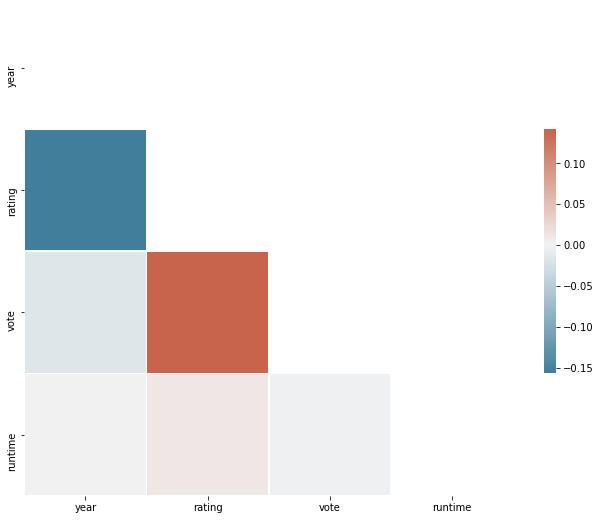

In [526]:
# Compute the correlation matrix
corr=file.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [527]:
## Missing data check
file.isna().sum()

year            0
kind            0
rating          0
vote            0
runtime         0
genre1          0
genre2       1748
country1        0
country2     6442
language1       0
language2    6378
cast1           0
cast2         329
director1       0
director2    7327
composer1       0
composer2    7065
writer1         0
writer2      3050
dtype: int64

In [547]:
file.fillna("None", inplace=True)

C:\Users\Michel\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [549]:
file

,year,kind,rating,vote,runtime,genre1,genre2,country1,country2,language1,language2,cast1,cast2,director1,director2,composer1,composer2,writer1,writer2
0,2003,tv mini series,7.7,474.0,50.000000,Documentary,Animation,United States,None,English,None,Christian Slater,Scott Sampson,Unknown,None,Unknown,None,Mike Carrol,Mike Carroll
1,1994,video movie,8.1,18.0,83.000000,Family,None,United States,None,English,None,Paula Abdul,Aurorah Allain,Steve Purcell,None,Unknown,None,Unknown,None
2,1992,movie,5.5,93.0,96.828211,Action,Sci-Fi,Japan,None,Japanese,None,Kai Shishido,Etsushi Takahashi,Yasuhiro Horiuchi,None,Carole King,None,Kazumasa Hirai,Jirô Kuwata
3,2004,movie,5.3,13432.0,60.000000,Documentary,Comedy,United States,None,English,German,Marlee Matlin,Elaine Hendrix,William Arntz,Betsy Chasse,Christopher Franke,None,William Arntz,Betsy Chasse
4,1991,movie,4.5,2177.0,96.000000,Comedy,Horror,United States,None,English,None,Brick Bronsky,Lisa Gaye,Eric Louzil,None,Bob Mithoff,None,Lloyd Kaufman,Carl Morano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,1969,movie,3.9,4384.0,96.828211,Adventure,Family,Japan,None,Japanese,None,Tomonori Yazaki,Hideyo Amamoto,Ishirô Honda,Jun Fukuda,Kunio Miyauchi,None,Shinichi Sekizawa,None
8065,2005,episode,6.4,44.0,96.083333,Documentary,Biography,Unknown,None,English,Spanish,Rena Baskin,Fulgencio Batista,Adriana Bosch,M Pink Christofalo,Mason Daring,None,Adriana Bosch,None
8066,2001,tv movie,4.9,2376.0,96.359350,Sci-Fi,Thriller,United States,None,English,None,David Keith,Stephanie Niznik,Matt Codd,None,Richard McHugh,None,Jonathan Raymond,Jonathan Raymond
8067,2003,movie,6.3,6501.0,96.828211,Drama,Music,United States,Germany,English,None,Neve Campbell,Malcolm McDowell,Robert Altman,None,Van Dyke Parks,None,Neve Campbell,Barbara Turner


In [550]:
## Reset index if needed

In [551]:
file.reset_index(drop=True,inplace=True)

<Figure size 720x432 with 0 Axes>

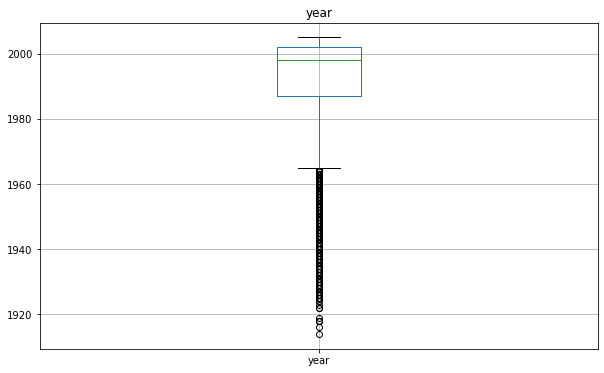

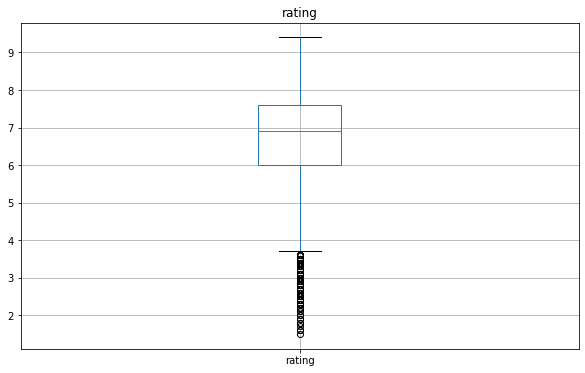

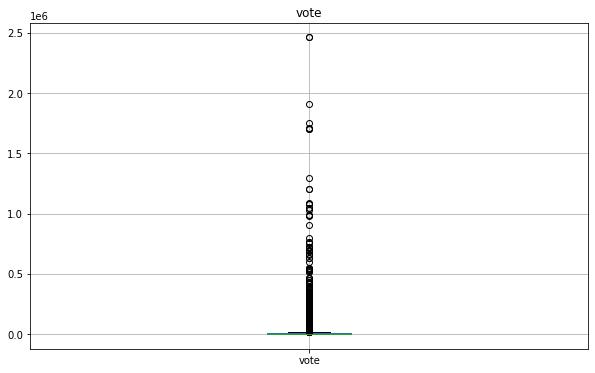

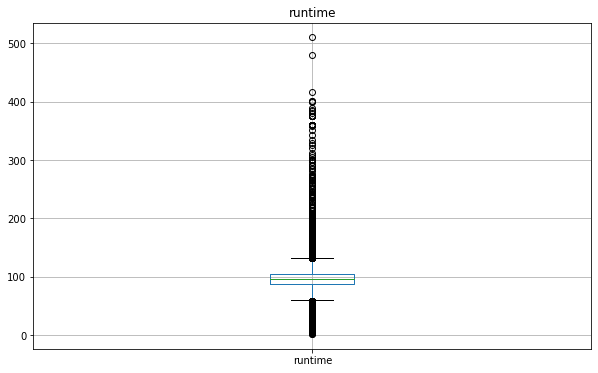

In [552]:
#Check Outliers - once cleaned

# Plot the variables (loop for plot variables) for num values
# We look for numeric data
num_df = file.select_dtypes(exclude=['object'])
plt.figure(figsize=(10, 6))
for col in num_df:
    plt.figure(figsize=(10, 6))
    file.boxplot(column=[col])
    plt.title(col)
    plt.savefig(col+r'2.png',bbox_inches='tight')

In [553]:
file.dtypes

year           int32
kind          object
rating       float64
vote         float64
runtime      float64
genre1        object
genre2        object
country1      object
country2      object
language1     object
language2     object
cast1         object
cast2         object
director1     object
director2     object
composer1     object
composer2     object
writer1       object
writer2       object
dtype: object

In [554]:
file['year']=file['year'].astype(int)

<ipython-input-554-80e66ab0c0e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file['year']=file['year'].astype(int)


In [555]:
file.head()

,year,kind,rating,vote,runtime,genre1,genre2,country1,country2,language1,language2,cast1,cast2,director1,director2,composer1,composer2,writer1,writer2
0,2003,tv mini series,7.7,474.0,50.000000,Documentary,Animation,United States,None,English,None,Christian Slater,Scott Sampson,Unknown,None,Unknown,None,Mike Carrol,Mike Carroll
1,1994,video movie,8.1,18.0,83.000000,Family,None,United States,None,English,None,Paula Abdul,Aurorah Allain,Steve Purcell,None,Unknown,None,Unknown,None
2,1992,movie,5.5,93.0,96.828211,Action,Sci-Fi,Japan,None,Japanese,None,Kai Shishido,Etsushi Takahashi,Yasuhiro Horiuchi,None,Carole King,None,Kazumasa Hirai,Jirô Kuwata
3,2004,movie,5.3,13432.0,60.000000,Documentary,Comedy,United States,None,English,German,Marlee Matlin,Elaine Hendrix,William Arntz,Betsy Chasse,Christopher Franke,None,William Arntz,Betsy Chasse
4,1991,movie,4.5,2177.0,96.000000,Comedy,Horror,United States,None,English,None,Brick Bronsky,Lisa Gaye,Eric Louzil,None,Bob Mithoff,None,Lloyd Kaufman,Carl Morano


In [559]:
file.shape

(8068, 19)

In [557]:
#Since we have only one value above 9.5, it creates some issues using Cross Validation so we prefer to drop the value above 9.5

In [558]:
file=file[file['rating']<9.5]

In [560]:
##Exporting File before encoding
file_url2 = r'C:\Users\Michel\git2\Ironhack-DAFT-Project7-ML-Netflix\imdb_processed_clean.csv'
file.to_csv(file_url2,index = False)

In [561]:
file

,year,kind,rating,vote,runtime,genre1,genre2,country1,country2,language1,language2,cast1,cast2,director1,director2,composer1,composer2,writer1,writer2
0,2003,tv mini series,7.7,474.0,50.000000,Documentary,Animation,United States,None,English,None,Christian Slater,Scott Sampson,Unknown,None,Unknown,None,Mike Carrol,Mike Carroll
1,1994,video movie,8.1,18.0,83.000000,Family,None,United States,None,English,None,Paula Abdul,Aurorah Allain,Steve Purcell,None,Unknown,None,Unknown,None
2,1992,movie,5.5,93.0,96.828211,Action,Sci-Fi,Japan,None,Japanese,None,Kai Shishido,Etsushi Takahashi,Yasuhiro Horiuchi,None,Carole King,None,Kazumasa Hirai,Jirô Kuwata
3,2004,movie,5.3,13432.0,60.000000,Documentary,Comedy,United States,None,English,German,Marlee Matlin,Elaine Hendrix,William Arntz,Betsy Chasse,Christopher Franke,None,William Arntz,Betsy Chasse
4,1991,movie,4.5,2177.0,96.000000,Comedy,Horror,United States,None,English,None,Brick Bronsky,Lisa Gaye,Eric Louzil,None,Bob Mithoff,None,Lloyd Kaufman,Carl Morano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,1969,movie,3.9,4384.0,96.828211,Adventure,Family,Japan,None,Japanese,None,Tomonori Yazaki,Hideyo Amamoto,Ishirô Honda,Jun Fukuda,Kunio Miyauchi,None,Shinichi Sekizawa,None
8064,2005,episode,6.4,44.0,96.083333,Documentary,Biography,Unknown,None,English,Spanish,Rena Baskin,Fulgencio Batista,Adriana Bosch,M Pink Christofalo,Mason Daring,None,Adriana Bosch,None
8065,2001,tv movie,4.9,2376.0,96.359350,Sci-Fi,Thriller,United States,None,English,None,David Keith,Stephanie Niznik,Matt Codd,None,Richard McHugh,None,Jonathan Raymond,Jonathan Raymond
8066,2003,movie,6.3,6501.0,96.828211,Drama,Music,United States,Germany,English,None,Neve Campbell,Malcolm McDowell,Robert Altman,None,Van Dyke Parks,None,Neve Campbell,Barbara Turner


## Encoding

In [562]:
file_clean = file.copy()

In [563]:
for col in file_clean.columns[5:]:
    print(col)

genre1
genre2
country1
country2
language1
language2
cast1
cast2
director1
director2
composer1
composer2
writer1
writer2


In [564]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for col in file_clean.columns[5:]:
    file_clean[col] = label.fit_transform(file_clean[col])

In [565]:
file_clean['kind'] = label.fit_transform(file_clean['kind'])

In [566]:
file_clean

,year,kind,rating,vote,runtime,genre1,genre2,country1,country2,language1,language2,cast1,cast2,director1,director2,composer1,composer2,writer1,writer2
0,2003,2,7.7,474.0,50.000000,6,2,62,71,16,110,817,4941,3923,611,2512,762,3299,2469
1,1994,7,8.1,18.0,83.000000,8,27,62,71,16,110,3598,381,3659,611,2512,762,4765,3786
2,1992,1,5.5,93.0,96.828211,0,20,37,71,33,110,2472,1621,4067,611,354,762,2582,1672
3,2004,1,5.3,13432.0,60.000000,6,4,62,71,16,37,3014,1499,4012,39,410,762,4877,288
4,1991,1,4.5,2177.0,96.000000,4,13,62,71,16,110,589,3310,1100,611,265,762,2868,405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,1969,1,3.9,4384.0,96.828211,1,8,37,71,33,110,4627,2083,1541,315,1438,762,4309,3786
8064,2005,0,6.4,44.0,96.083333,6,3,63,71,16,95,3794,1754,31,374,1641,762,31,3786
8065,2001,3,4.9,2376.0,96.359350,19,24,62,71,16,110,1086,5126,2551,611,2086,762,2397,1811
8066,2003,1,6.3,6501.0,96.828211,7,14,62,19,16,110,3391,3452,3261,611,2517,762,3441,231


from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in file.columns[5:]:
    print(col)
le.fit(titanic['sex'])
titanic['sex'] = le.transform(titanic['sex'])
 1 is male , 0 is female

In [567]:
##Exporting File before encoding
file_url3 = r'C:\Users\Michel\git2\Ironhack-DAFT-Project7-ML-Netflix\imdb_processed_clean_encoded.csv'
file_clean.to_csv(file_url3,index = False)

In [568]:
file

,year,kind,rating,vote,runtime,genre1,genre2,country1,country2,language1,language2,cast1,cast2,director1,director2,composer1,composer2,writer1,writer2
0,2003,tv mini series,7.7,474.0,50.000000,Documentary,Animation,United States,None,English,None,Christian Slater,Scott Sampson,Unknown,None,Unknown,None,Mike Carrol,Mike Carroll
1,1994,video movie,8.1,18.0,83.000000,Family,None,United States,None,English,None,Paula Abdul,Aurorah Allain,Steve Purcell,None,Unknown,None,Unknown,None
2,1992,movie,5.5,93.0,96.828211,Action,Sci-Fi,Japan,None,Japanese,None,Kai Shishido,Etsushi Takahashi,Yasuhiro Horiuchi,None,Carole King,None,Kazumasa Hirai,Jirô Kuwata
3,2004,movie,5.3,13432.0,60.000000,Documentary,Comedy,United States,None,English,German,Marlee Matlin,Elaine Hendrix,William Arntz,Betsy Chasse,Christopher Franke,None,William Arntz,Betsy Chasse
4,1991,movie,4.5,2177.0,96.000000,Comedy,Horror,United States,None,English,None,Brick Bronsky,Lisa Gaye,Eric Louzil,None,Bob Mithoff,None,Lloyd Kaufman,Carl Morano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,1969,movie,3.9,4384.0,96.828211,Adventure,Family,Japan,None,Japanese,None,Tomonori Yazaki,Hideyo Amamoto,Ishirô Honda,Jun Fukuda,Kunio Miyauchi,None,Shinichi Sekizawa,None
8064,2005,episode,6.4,44.0,96.083333,Documentary,Biography,Unknown,None,English,Spanish,Rena Baskin,Fulgencio Batista,Adriana Bosch,M Pink Christofalo,Mason Daring,None,Adriana Bosch,None
8065,2001,tv movie,4.9,2376.0,96.359350,Sci-Fi,Thriller,United States,None,English,None,David Keith,Stephanie Niznik,Matt Codd,None,Richard McHugh,None,Jonathan Raymond,Jonathan Raymond
8066,2003,movie,6.3,6501.0,96.828211,Drama,Music,United States,Germany,English,None,Neve Campbell,Malcolm McDowell,Robert Altman,None,Van Dyke Parks,None,Neve Campbell,Barbara Turner
